In [3]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency




In [4]:
#Setting plot configurations
%matplotlib inline
rcParams['figure.figsize']= 5,4
sns.set_style('whitegrid')

In [5]:
#loading the file
df= pd.read_csv('phising.csv')
print(df.shape)
df.head()


(11055, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
#performing basic checks
print(df.isnull().sum())
print(df.info())


having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

 1    6157
-1    4898
Name: Result, dtype: int64


C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


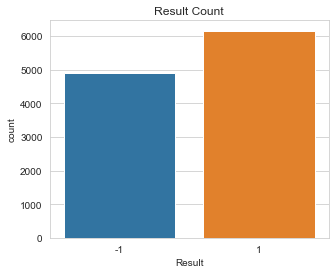

In [7]:
print(df.Result.value_counts())
sns.countplot(df.Result)
plt.title("Result Count")
plt.show()

No null values detected. However dtype of columns are  continous. There is an imbalance between the majority and minoriy classes

**EDA**

C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

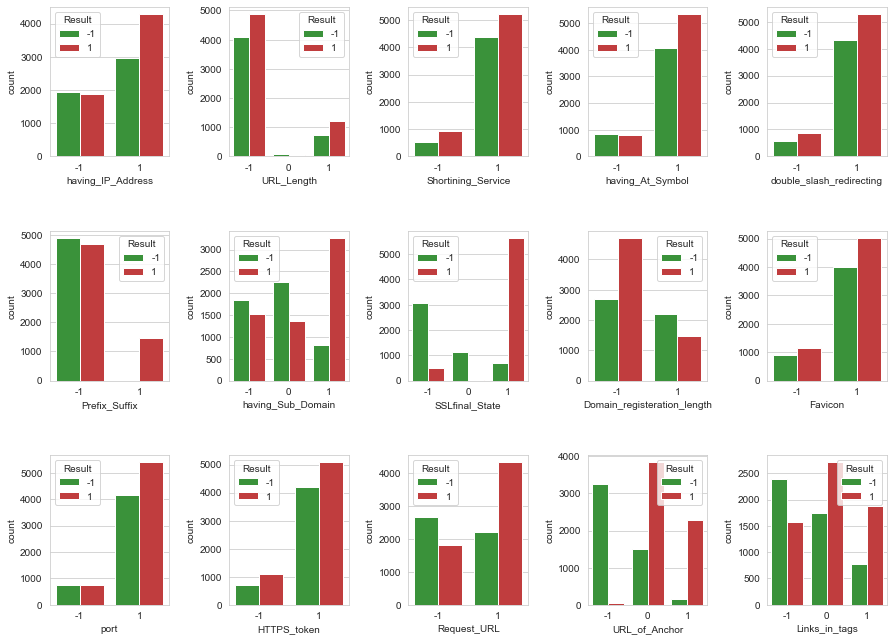

In [8]:
#Countplots for first 15 features
rcParams['figure.figsize'] = 15,11 #rcParameters run configuration parameters
c_palette = ['tab:green', 'tab:red']

f,ax=plt.subplots(3,5)
sns.countplot('having_IP_Address',hue='Result',data=df,ax=ax[0,0],palette=c_palette)
sns.countplot('URL_Length',hue='Result',data=df,ax=ax[0,1],palette=c_palette)
sns.countplot('Shortining_Service',hue='Result',data=df,ax=ax[0,2],palette=c_palette)
sns.countplot('having_At_Symbol',hue='Result',data=df,ax=ax[0,3],palette=c_palette)
sns.countplot('double_slash_redirecting',hue='Result',data=df,ax=ax[0,4],palette=c_palette)
sns.countplot('Prefix_Suffix',hue='Result',data=df,ax=ax[1,0],palette=c_palette)
sns.countplot('having_Sub_Domain',hue='Result',data=df,ax=ax[1,1],palette=c_palette)
sns.countplot('SSLfinal_State',hue='Result',data=df,ax=ax[1,2],palette=c_palette)
sns.countplot('Domain_registeration_length',hue='Result',data=df,ax=ax[1,3],palette=c_palette)
sns.countplot('Favicon',hue='Result',data=df,ax=ax[1,4],palette=c_palette)
sns.countplot('port',hue='Result',data=df,ax=ax[2,0],palette=c_palette)
sns.countplot('HTTPS_token',hue='Result',data=df,ax=ax[2,1],palette=c_palette)
sns.countplot('Request_URL',hue='Result',data=df,ax=ax[2,2],palette=c_palette)
sns.countplot('URL_of_Anchor',hue='Result',data=df,ax=ax[2,3],palette=c_palette)
sns.countplot('Links_in_tags',hue='Result',data=df,ax=ax[2,4],palette=c_palette)
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

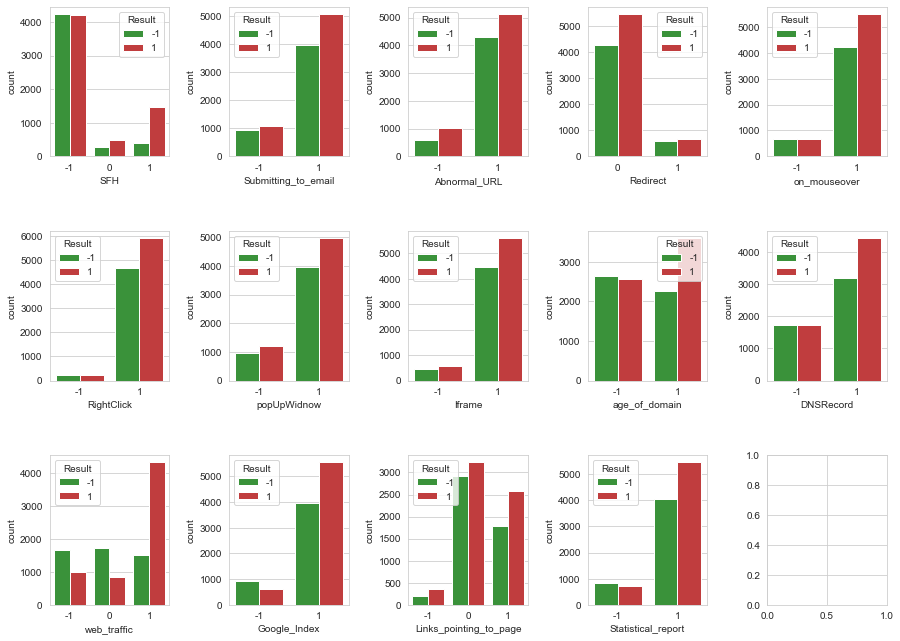

In [10]:
#countplot for rest of the features
f,ax=plt.subplots(3,5)
sns.countplot('SFH',hue='Result',data=df,ax=ax[0,0],palette=c_palette)
sns.countplot('Submitting_to_email',hue='Result',data=df,ax=ax[0,1],palette=c_palette)
sns.countplot('Abnormal_URL',hue='Result',data=df,ax=ax[0,2],palette=c_palette)
sns.countplot('Redirect',hue='Result',data=df,ax=ax[0,3],palette=c_palette)
sns.countplot('on_mouseover',hue='Result',data=df,ax=ax[0,4],palette=c_palette)
sns.countplot('RightClick',hue='Result',data=df,ax=ax[1,0],palette=c_palette)
sns.countplot('popUpWidnow',hue='Result',data=df,ax=ax[1,1],palette=c_palette)
sns.countplot('Iframe',hue='Result',data=df,ax=ax[1,2],palette=c_palette)
sns.countplot('age_of_domain',hue='Result',data=df,ax=ax[1,3],palette=c_palette)
sns.countplot('DNSRecord',hue='Result',data=df,ax=ax[1,4],palette=c_palette)
sns.countplot('web_traffic',hue='Result',data=df,ax=ax[2,0],palette=c_palette)
sns.countplot('Google_Index',hue='Result',data=df,ax=ax[2,1],palette=c_palette)
sns.countplot('Links_pointing_to_page',hue='Result',data=df,ax=ax[2,2],palette=c_palette)
sns.countplot('Statistical_report',hue='Result',data=df,ax=ax[2,3],palette=c_palette)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

**Chi-Squared test**


In [11]:

df1=df.apply(LabelEncoder().fit_transform)#to remove negative values


In [12]:
# testing the relationship between Result

cols=df1.drop('Result',axis=1)
chi2_check = []
for i in cols:
    if chi2_contingency(pd.crosstab(df['Result'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(chi2_check,index=cols.columns)

print(res)

                                                          0
having_IP_Address                    Reject Null Hypothesis
URL_Length                           Reject Null Hypothesis
Shortining_Service                   Reject Null Hypothesis
having_At_Symbol                     Reject Null Hypothesis
double_slash_redirecting             Reject Null Hypothesis
Prefix_Suffix                        Reject Null Hypothesis
having_Sub_Domain                    Reject Null Hypothesis
SSLfinal_State                       Reject Null Hypothesis
Domain_registeration_length          Reject Null Hypothesis
Favicon                      Fail to Reject Null Hypothesis
port                                 Reject Null Hypothesis
HTTPS_token                          Reject Null Hypothesis
Request_URL                          Reject Null Hypothesis
URL_of_Anchor                        Reject Null Hypothesis
Links_in_tags                        Reject Null Hypothesis
SFH                                  Rej

In [13]:
#drop non related features
df.drop(columns=['Statistical_report','Iframe','popUpWidnow',
         'on_mouseover','Submitting_to_email',
         'HTTPS_token','port','Favicon','having_At_Symbol'],
        axis=1,inplace=True)

In [14]:
X= df.iloc[:,:-1].astype(object)
y=df['Result']

In [ ]:
X.head(5)